In [71]:
# Neccesary import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Number of rows and columns to display
filePath = '../data/products.csv'
df = pd.read_csv(filePath)
row , col = df.shape
print("Number of rows: ", row)
print("Number of columns: ", col)


Number of rows:  53
Number of columns:  5


In [73]:
# Showing the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   53 non-null     object
 1   Current Date   53 non-null     object
 2   Current Price  53 non-null     int64 
 3   Old Date       53 non-null     object
 4   Old Price      53 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [74]:
# Filtering the duplicated rows and printing the head of the dataframe

duplicates = df.duplicated()
numDuplicates = duplicates.sum()

print("Number of duplicated rows: ", numDuplicates)

Number of duplicated rows:  0


In [75]:
# Dropping the duplicated rows if there is any
# Printing the number of rows and columns after dropping the duplicated rows

wODuplicates = df[~duplicates]

rowUpdated, col = wODuplicates.shape

print("Number of rows after dropping the duplicated rows: ", rowUpdated)
print("Number of columns after dropping the duplicated rows: ", col)
print("Number of rows dropped: ", row - rowUpdated)

Number of rows after dropping the duplicated rows:  53
Number of columns after dropping the duplicated rows:  5
Number of rows dropped:  0


In [76]:
# Double checking if there is any duplicated rows

doubleCheckDf = wODuplicates.duplicated()
numDoubleCheck = doubleCheckDf.sum()

print("After double checking, number of duplicated rows: ", numDoubleCheck)

After double checking, number of duplicated rows:  0


In [77]:
# After cleaning the dataset, Exploring the dataset

df = wODuplicates

df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price
0,Apple iPhone 11 128GB Akıllı Cep Telefonu,22/05/2023,18319,22/05/2022,12699
1,Sony Playstation 5 Oyun Konsolu,22/05/2023,14729,23/05/2022,13499
2,Apple iPhone 12 5G 64GB 4GB Ram 6.1 inç 12MP A...,22/05/2023,24999,08/06/2022,19798
3,Apple iPhone 13 Pro Max 5G 128GB 6GB Ram 6.7 i...,22/05/2023,44999,23/05/2022,27999
4,Apple AirPods 2. Nesil MV7N2TU-A Bluetooth Kul...,22/05/2023,2689,23/05/2022,1851


In [78]:
# Showing the statistical information of the dataset

df.describe()

,Current Price,Old Price
count,53.000000,53.000000
mean,4680.603774,3496.716981
std,9354.944493,6678.620206
min,5.000000,3.000000
25%,54.000000,42.000000
50%,389.000000,283.000000
75%,2689.000000,1851.000000
max,44999.000000,27999.000000


In [79]:
# Creating a new column named "Price Increase Rate" and calculating the price increase rate
# AND
# Showing the statistical information of the dataset

df['Price Increase Percentage'] = (df['Current Price'] - df['Old Price']) / df['Current Price'] * 100

df.describe()

,Current Price,Old Price,Price Increase Percentage
count,53.000000,53.000000,53.000000
mean,4680.603774,3496.716981,21.098501
std,9354.944493,6678.620206,27.333879
min,5.000000,3.000000,-96.321070
25%,54.000000,42.000000,8.350872
50%,389.000000,283.000000,25.641026
75%,2689.000000,1851.000000,39.130435
max,44999.000000,27999.000000,63.247863


In [82]:
# Creating a new dataframe named "df2"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Current Price" column (descending order)
# Showing 3 products with the highest current price

df2 = df.sort_values(by=['Current Price'], ascending=False)

df2.head(3)

,Product Name,Current Date,Current Price,Old Date,Old Price,Price Increase Percentage
3,Apple iPhone 13 Pro Max 5G 128GB 6GB Ram 6.7 i...,22/05/2023,44999,23/05/2022,27999,37.778617
18,Apple Macbook Pro MYD82TU-A M1 8GB Ram 256GB S...,22/05/2023,29860,07/06/2022,23029,22.876758
2,Apple iPhone 12 5G 64GB 4GB Ram 6.1 inç 12MP A...,22/05/2023,24999,08/06/2022,19798,20.804832


In [81]:
# Creating a new dataframe named "df3"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Price Increase Percentage" column (descending order)
# Showing 3 products with the highest price increase percentage

df3 = df.sort_values(by=['Price Increase Percentage'], ascending=False)

df3.head(3)


,Product Name,Current Date,Current Price,Old Date,Old Price,Price Increase Percentage
6,JBL TUNE 500 Mavi Kulaklık,22/05/2023,819,23/05/2022,301,63.247863
39,Faber Castell Grip 2011 0.7mm Mavi Versatil Kalem,22/05/2023,195,22/05/2022,75,61.538462
31,Nike Dominate Basketbol Topu,22/05/2023,449,02/06/2022,187,58.351893


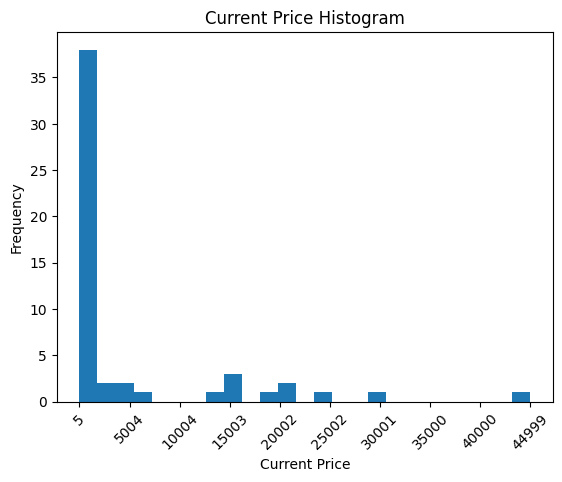

In [92]:
# Creating a histogram for the "Current Price" column with bins=25

plt.hist(df['Current Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Current Price'].min(), df['Current Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)

plt.show()

In [89]:
# Showing the statistical information of the "Current Price" column
print(df['Current Price'].describe())

count       53.000000
mean      4680.603774
std       9354.944493
min          5.000000
25%         54.000000
50%        389.000000
75%       2689.000000
max      44999.000000
Name: Current Price, dtype: float64


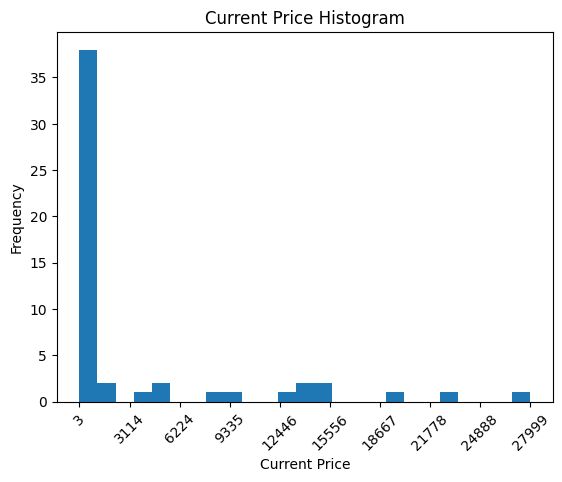

In [94]:
# Creating a histogram for the "Old Price" column with bins=25

plt.hist(df['Old Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Old Price'].min(), df['Old Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)

plt.show()

In [95]:
# Showing the statistical information of the "Old Price" column
print(df['Old Price'].describe())

count       53.000000
mean      3496.716981
std       6678.620206
min          3.000000
25%         42.000000
50%        283.000000
75%       1851.000000
max      27999.000000
Name: Old Price, dtype: float64


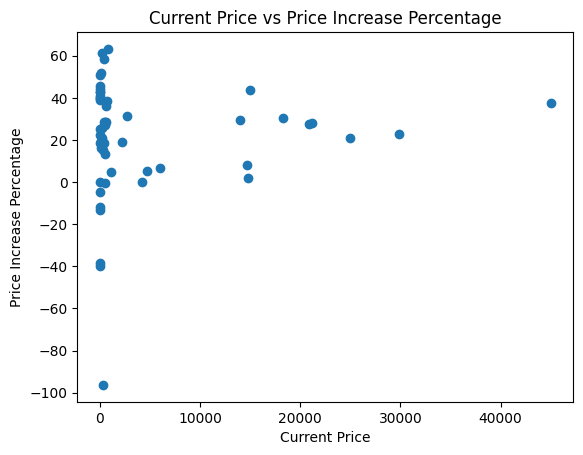

In [96]:
# Plotting the relationship between the "Current Price" and "Price Increase Percentage" columns

plt.scatter(df['Current Price'], df['Price Increase Percentage'])

plt.title("Current Price vs Price Increase Percentage")
plt.xlabel("Current Price")
plt.ylabel("Price Increase Percentage")

plt.show()

In [97]:
# Creating a new column named "Price Increase Status"
# If the price increase percentage is below 0, it will be "Decreased"
# If the price increase percentage is between 0 and 5, it will be "Stable"
# If the price increase percentage is between 5 and 30, it will be "Increased"
# If the price increase percentage is between 30 and 50, it will be "Highly Increased"
# If the price increase percentage is above 50, it will be "Extremely Increased"

# Showing the head of the dataframe

def priceIncreaseStatus(priceIncreasePercentage):
    if priceIncreasePercentage < 0:
        return "Decreased"
    elif priceIncreasePercentage >= 0 and priceIncreasePercentage < 5:
        return "Stable"
    elif priceIncreasePercentage >= 5 and priceIncreasePercentage < 30:
        return "Increased"
    elif priceIncreasePercentage >= 30 and priceIncreasePercentage < 50:
        return "Highly Increased"
    else:
        return "Extremely Increased"
    
df['Price Increase Status'] = df['Price Increase Percentage'].apply(priceIncreaseStatus)

df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price,Price Increase Percentage,Price Increase Status
0,Apple iPhone 11 128GB Akıllı Cep Telefonu,22/05/2023,18319,22/05/2022,12699,30.678530,Highly Increased
1,Sony Playstation 5 Oyun Konsolu,22/05/2023,14729,23/05/2022,13499,8.350872,Increased
2,Apple iPhone 12 5G 64GB 4GB Ram 6.1 inç 12MP A...,22/05/2023,24999,08/06/2022,19798,20.804832,Increased
3,Apple iPhone 13 Pro Max 5G 128GB 6GB Ram 6.7 i...,22/05/2023,44999,23/05/2022,27999,37.778617,Highly Increased
4,Apple AirPods 2. Nesil MV7N2TU-A Bluetooth Kul...,22/05/2023,2689,23/05/2022,1851,31.164001,Highly Increased


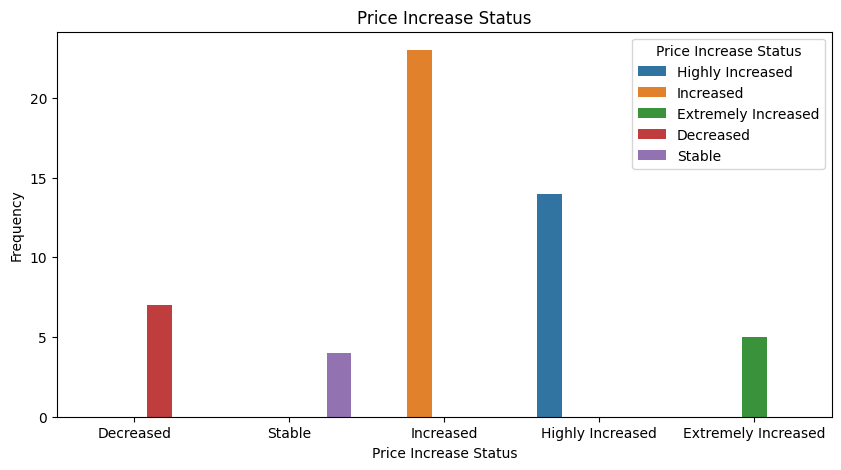

In [98]:
# Visualizing the "Price Increase Status" column with a bar plot

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Price Increase Status', hue='Price Increase Status', order = ['Decreased', 'Stable', 'Increased', 'Highly Increased', 'Extremely Increased'])
plt.title("Price Increase Status")
plt.xlabel("Price Increase Status")
plt.ylabel("Frequency")

plt.show()